# Linear Regression

##### A linear model makes a prediction by simply computing the weighted sum of the input features, plus a constant called the *bias term*(also called the *intercept term*) 
##### $ y = \theta_0\ + \theta_1x_1 + \theta_2x_2...+\theta_nx_n$
#####  -  $\hat y$ is the predicted value
#####  -  $n$ is the number of features
#####  -  $x_i$ is the  $i^{th}$ feature
#####  - $\theta_j$  is the $j^{th}$ model parameter(including the bias term $\theta_0$ and the feature weights $\theta_1 , \theta_2 ,..... \theta_n$)

#####  In vectorised form
##### $y = h_\theta (X) = \theta.X$

#####  -  $\theta$ is the model's parameter vector, containing the bias term $\theta_0$ and the feature weights $\theta_1$ to $\theta_n$
#####  -  X is the instance's feature vector , containing the bias term $x_0$ to $x_n$ , with $x_0$ always equal to 1.
#####  -  $\theta . X$ is the dot product of the vectors $\theta$ and X, which is equal to $\theta_0x_0 + \theta_1x_1 + .... + \theta_nx_n$
##### - $h_\theta$ is the hypothesis function, using the model  parametrs $\theta$


#### Note:
   #####      In Machine Learning , vectors are often represented as *column vector* , which are 2D arrays with a single column. If  **$\theta$** and **x** are column vectors, then the prediction is: **$y = \theta^TX$**  .  It is the same prediction , except it is now represented as a single cell matrix rather than a scalar value.  

##### Training a model means setting its parameters so that the model fits the training set. For this purpose , we first need a measure of how well (or poorly) the model fits the training data. The most common performance measure of a regression model iis the Root Mean Squared Error(rmse). Therefore , to train a Linear Regression model, need to find the value of  $\theta$ that minimizes the RMSE. In practice , it is simpler to minimize the Mean Square Error(MSE) than the RMSE, and it leads to the same result ( because a value that minimizes a function also minimizes its square root) 

####  MSE cost fuction for a Linear Regression model
 
 ####             $MSE(X,h_\theta) = \frac{1}{m}\sum_{i=1}^m(\theta^TX^{(i)} - y^{(i)})$   

### Normal Equation

#####        To find value of **$\theta$** that minimizes the cost function, there is a *closed-form solution* , a mathematical equation that gives the result directly. This is the *Normal Equation*
#####                          $\hat \theta = (X^TX)^{-1} X^T y$
#####   - $\hat \theta$ is the value of $\theta$ that minimizes the cost function
#####   - $y$ is the vector or target values conataining $y^{(1)}$ to  $y^{(m)}$

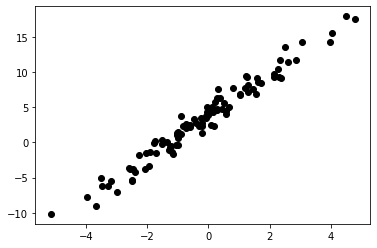

In [1]:
#generating some linear-looking data to test this equation
import numpy as np
import matplotlib.pyplot as plt
x = 2 * np.random.randn(100, 1)
y = 4 + 3 * x + np.random.randn(100,1) # randomly adding noise to 4+3x
plt.scatter(x, y, c='k')


In [4]:
"""let's compute theta using the normal equation . We will
use the inv() function from NumPy's linalg module to compute
inverse of a matrix and dot()
"""
x_b = np.c_[np.ones((100,1)), x] #add x0=1 to each instance
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)
"""The actual function that we used to generate the data
is y = 4+3x1+Gaussian noise
"""
theta_best

array([[3.88491554],
       [3.02042221]])

In [5]:
theta_best

array([[3.88491554],
       [3.02042221]])

#####  we hoped for  $\theta_0 = 4$  and  $\theta_1 = 3$ instead we got $ \theta_0 = 4.06$  and  $\theta_1 = 2.93 $

In [6]:
#making predictions using theta
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2,1)), x_new] #add x0 = 1 to each instance
y_predict = x_new_b.dot(theta_best)
y_predict


array([[3.88491554],
       [9.92575997]])

[0, 2, 0, 16]

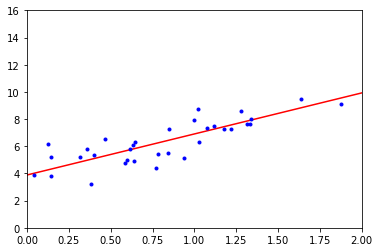

In [7]:
# plotting models predictions
plt.plot(x_new, y_predict, "r-")
plt.plot(x, y, "b.")
plt.axis([0,2,0,16])


In [8]:
# performing Linear Regression using sklearn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)
lin_reg.intercept_ , lin_reg.coef_

(array([3.88491554]), array([[3.02042221]]))

In [9]:
lin_reg.predict(x_new)

array([[3.88491554],
       [9.92575997]])

In [10]:
"""The LinearRegression class is based on the 
scipy.linalg.lstsq() function which can be applied
directly
"""
theta_best_svd, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)
theta_best_svd


array([[3.88491554],
       [3.02042221]])

#####  This function computes $\hat\theta = X^{+}y$ where $X^{+}$ is the *pseudoinverse* of X(specifically the Moore-Penrose inverse). You can use np.linalg.pinv() to compute the pseudoinverse directly

In [11]:
np.linalg.pinv(x_b).dot(y)

array([[3.88491554],
       [3.02042221]])

#####  The pseudoinverse itself is computed using standard matrix factorization technique called *Singular Value Decomposition(SVD)* that can decompose the training set matrix $X$ into the matrix multiplication of three matrices $U\Sigma V^T$ . The pseudoinverse is computed as $X^{+} = V\Sigma^{+}U^T$. To compute the matrix $\Sigma^{+}$, the algorithm takes $\Sigma$ and sets to zero all values smaller than a thhreshold value, then it replaces all the non-zero values with their inverse, and finally it transposes the resulting matrix. This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely:indeed, the Normal Equation may not work if the matrix $X^TX$ is not invertible, such as if m < n or if some features are redundant , but the pseudoinverse is always defined

### Computational Complexity

#####  The Normal Equation computes the inverse of $X^TX$, which is an $(n+1) by (n+1)$ matrix (where $n$ is the number of features) . The *computational complexity* of inverting such a matrix is typically about $O(n^{2.4})$ to $O(n^{3})$  

#### Note
#####  Both the Normal Equation and SVD  approach get very slow when the number of features grow large. On the positive side , both are linear with regards to the number of instances in the training set ($O(m)$) , so they handle large training sets efficiently, provided they can fit in memory

## Gradient Descent 

#####  *Gradient Descent* is a very generic optimization algorithm capable of  finding optimal solutions to a wide range of problems . The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. 

##### Concretely you start by filling **$\theta$**  with random values ( this is called *random initialization*) , and then improve it gradually , taking one baby step at a time, each step attempting to decrease the cost function, untill algorithm converges to  a minimum 
##### An important parameter in Gradient Descent is the size of the steps, determined by the *learining rate*  hyperparameter. If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time
##### On the other hand , if the learining rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This makes the algorithm diverge, with larger and larger values, failing to find a good solution

#####  The MSE cost function for Linear Regression model happens to be a convex function, which means that if you pick any two points on the curve , the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly. These two facts have great consequences: Gradient Descent is guarantedd to approach arbitraritly close the global minimum

###  Batch Gradient Descent


#####  To implement Gradient Descent, you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$ . In other words you need to calculate how much the cost function will change if you change  $\theta_j$   a little bit . This is the partial derivative

###  $\frac{\partial}{\partial\theta_j}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^TX^{(i)} - y^{(i)})x_j^{(i)}$

#####  Instead of computing these partial derivatives individually , we can compute the all in one go.  The gradient vector, noted $\nabla_\theta MSE(\theta)$ contains all the partial derivatives of the cost funtion(one for each model parameter)

###  $\nabla_\theta MSE(\theta) = \begin{bmatrix}\frac{\partial}{\partial\theta_0}MSE(\theta)\\ \frac{\partial}{\partial\theta_1}MSE(\theta) \\.\\.\\.\\ \frac{\partial}{\partial\theta_n}MSE(\theta) \end{bmatrix}  = \frac{2}{m}X^T(X\theta - y)$ 

#### Note
##### This formula involves calculations over the full training set X, at each Gradient Descent step. This is why the algorithm is called *Batch Gradient Descent* :it uses the whole batch of training data at every step. As a result it is terribly slow on verlylarge trainig sets. However Gradient descent scales well with the number of features; training a Linear Regression model when there are hundreds of thousands of  features is much faster using Gradient Descent than using the Normal Equation or SVD decomposition.

#####  once you have the gradient vector, which points uphill, just go in the opposite direction to  go downhill. This means substracting $\nabla_\theta MSE(\theta)$ from $\theta$. This is where the learning rate $\alpha$ comes

##### $\theta^{(next step)} = \theta - \alpha\nabla_\theta MSE(\theta)$ 

In [12]:
# implementation of gradient descent
def batch_gradient_descent(x,y,alpha=0.1, n_iterations=10000, m=100):
    theta = np.random.randn(2,1) #random initialization
    for iteration in range(n_iterations):
        gradients = 2/m * (x.T.dot(x.dot(theta) - y))
        theta = theta - alpha * gradients
        return theta
batch_gradient_descent(x_b, y)

array([[-0.05706103],
       [ 2.13748521]])

### Stochastic Gradient Descent

   ######  The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme , *Stochastic Gradient Descent* just picks a random instance in the training set at every step and computes gradients based only on the single instance. Obviously this makes the algorithm much faster since it has very little data to manipulate at every iteration. It also makes it possible to train on huge training set, since only one instance needs to be in memory at each iteration. (SGD can be implemented as an out-of -core algorithm)

######  On the other hand , due to its stochsitic nature, this algorithm is much less regular than Batch Gradient Descent: instead of gently decreasing untill it reaches the minimum, the cost function will bounce up and down , decreasing only on average . Over time it wil end up very close to the minimum, but once it gets there it will continue to bounce around , never settling down. So once the algorithm stops , the final parameter values are good , but not optimal

###### When the cost function is very irregular , this can actually help the algorithm jump out of local minima , so Stochastic Gradient Descent has a better chance of finding the global minimum than Batch Gradient Descent does.

######  Therefore randomness is good to escape from local optima, but bad because it means that the algorithm can never settle at the minimum. One solution to this dilemma is to gradually reduce the learning rate . The steps start out large(which helps make quick progress  and escape local minima) , then get smaller and smaller , allowing the algorithm to settle at the global minimum. This process is akin to **Simulated annealing**, an algorithm inspired from the process of annealing in metallurgy  where molten metal is slowly cooled down. The function that determines the learning rate at each iteration is called *learning schedule*.  If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for long time and end up with a suboptimal solution   

In [13]:
# implementing stochastic gradient descent
n_epochs = 50 #iteration num
t0, t1 = 5, 50 #learning schedule hyperparameters

def learning_schedule(t):
    return t0/(t+t1)

theta=np.random.randn(2,1) #random initialisation
m = 100

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * (xi.T.dot(xi.dot(theta) - yi))
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha * gradients 

"""
By convention we iterate by rounds of m iteration;
each is called an epoch . While the Batch Gradient Descent
code iterated 1,000 times through the whole training set,
this code goes through the training set only 50 times
and reaches a fairly good solution
"""

theta

array([[3.86638676],
       [3.03190657]])

##### Note

###### When using SGD , the training instances must be independent and identically distributed, to ensure that the parameters get pulled towards the global minimum, on average. A simple way to ensure this is to shuflle the instances during training.  If you do not do this , for example if the instances arae sorted by label, then SGD will start by optimizing for one label, then the next , and so on, and it will not settle close to the minimum


In [14]:
# just trying sgd on another example
x = 2 * np.random.randn(100,1)
y = 1 +  1 * x + np.random.randn(100,1)
x_final = np.c_[np.ones((100, 1)), x]

n_epochs = 50 # num of rounds of m iteration
t0, t1 = 5, 50 #learning schedule 

# learning which changes(decreases) after each iteration
def learning_schedule(t):
    return t0/(t+t1)

#sgd
def stochastic_gradient_descent(x, y ):
    m = 100
    theta = np.random.randn(2,1)
    for epochs in range(n_epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = x[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            gradient = 2 * (xi.T.dot(xi.dot(theta) - yi ))
            alpha = learning_schedule(n_epochs * m + i)
            theta = theta - alpha * gradient
    return theta
            
stochastic_gradient_descent(x_final, y)
#x_final

array([[0.94306996],
       [0.90030611]])

To perform Linear Regression using SGD with sklearn, you can use  the SGDRegressor class, which defaults to optimizing the squared error cost function . The following code runs for 1000 epochs(max_iter=1000) or untill the loss drops by less than 1e-3 during one epoch(tol = 1e-3) , starting with a learning rate or 0.1, using the default learning schedule(different from preceding one) , and it does not use any regularization(penalty=None)

In [15]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000 , tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([0.94856619]), array([0.90964647]))

####  Mini-batch Gradient Descent

The last Gradient Descent algorithm i look,  is called *Mini-batch Gradient Descent* .It is quite easy to understand once you know Batch and Stochastioc Gradient Descent: at each step , instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance(as in SGD) , Mini batch GD computes the gradients on small random sets of instances called *mini batches* . The main advantage of Mini-Batch GSD over Stochastic GD is that you can get a performance boost by hardware optimization of matrix operations, especially when using GPUs.
    
The algorithm's progress in parameter space is less erratic than with SGD, especially with fairly large mini-batches. As a result , Mini-batch GD will end up walking around a bit closer to minimum the SGD . But, on the other hand , it may be harder for it to escape from local minima.  

### Polynomial Regression

Polynomial Regression is when your data is more complex than a simple straight line, Surprisingly you  can actually use a linear model to fit nonlinear data. A simple way to do this is to add powers of each features as new features, then train a linear model on this extended set of features . This is *Polynomial Regression*

[-5, 5, 0, 10]

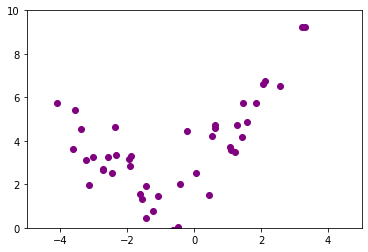

In [16]:
# looking at a quadratic model
m = 100
X = 6 * np.random.randn(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)
plt.scatter(X, y, c = "PURPLE")
plt.axis([-5, 5, 0, 10])

In [17]:
"""
Clearly a straight line will never fit this data 
properly. 
"""

'\nClearly a straight line will never fit this data \nproperly. \n'

In [18]:
# fitting using polynomial features from sklearn
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

#X_poly now contains the orginal features of X 
# plus  the square of the features
X_poly[0]

array([-7.83732035, 61.42359032])

In [19]:
# fitting linear regression to this model
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_
predictions = lin_reg.predict(X_poly)



[-3, 3, 0, 10]

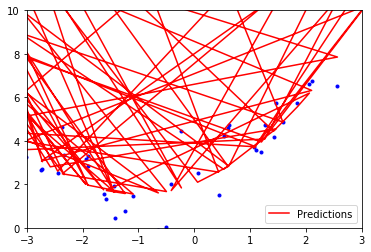

In [20]:
plt.plot(X, y, 'b.')
plt.plot(X, predictions, "r-", label='Predictions', )
plt.legend()
plt.axis([-3,3, 0, 10])


When there are multiple features , Polynomial Regression is capable of finding relationships between features(which is something plain Linear Regression model cannot do). This is made possible by the fact that PolunomialFeatures also adds all combinations of features up to the given degree. For example , if there were two features $a$ and $b$, PolynomialFeatures with degree = 3 would not only add the features $a^2, a^3, b^2 and b^3$ , but also the combinations of $ab, a^2b, and ab^2$


PolynomialFeatures(degree=d) transform an array containig $n$ features into an array containig $\frac{(n+d)!}{d!n!}$ features

### Learning Curves

If you perform high-degree Polynomial Regression , you will likely fit the training data much better than with plain Linear Regression. The higher degree polynomial model will overfit the training data. In general you wont know what function generated the data, so how can you decide how complex your model should be? How can you tell your model is overfitting or underfitting the data?
    
   By using cross validation , If a model performs well on the trainig data  but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly  on both , then it is underfitting. This is one way to tell when a model is too simple or too complex.
   
   Another way is to look at the *learning curves*: these are plots of the model's performance on the training set and the validation set as a function of the training set size (or the training set  iteration) . To generate the plots, simply train the model several times on different sized subsets of the training set. 

In [21]:
#function to plot the learning curves
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, x, y):
    x_train, x_val, y_train, y_val = train_test_split(x,y, test_size = 0.2)
    train_errors, val_errors = [],[]
    for m in range(1, len(x_train)):
        model.fit(x_train[:m],y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label='train')
    plt.plot(np.sqrt(val_errors), "b-", linewidth = 3, label="val")

    plt.legend()
    plt.show()
        

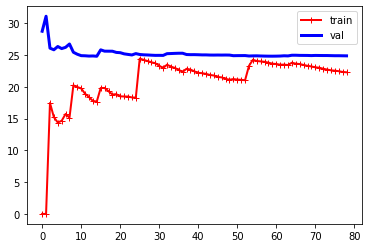

In [22]:
lin_reg = LinearRegression()
m = 100
x = 6 * np.random.randn(100, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(100, 1)
plot_learning_curves(lin_reg, x, y)

First look at the performance on the training data: when there are just one or two instances on the training set, the model can fit them perfectly, which why the curve start at zero. But as new instances are added to the training set , it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn't make the average error much better or worse. Now, let's look at the performance of the model on the validation data. When the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then as the model is shown more training examples, it learns and thus the validation error slowly goes down. These learning curves are typical examples of an underfitting model. Both curves have reached a plateau; they are close and fairly high.


__If your model is underfitting the training data, adding more training examples will not help. You need to use a more complex model or come with better features__

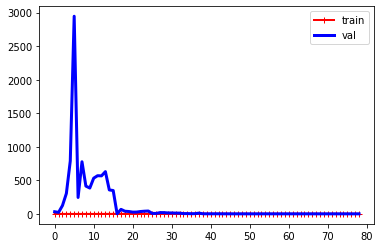

In [23]:
# looking at 10th degree polynomial
from sklearn.pipeline import Pipeline
polynomial_reg = Pipeline([('poly_features', PolynomialFeatures(degree=10, include_bias=False)),("lin_reg", LinearRegression())])
plot_learning_curves(polynomial_reg, x,  y)

- The error on the training data is much lower than with LinearRegression model


- There is a gap between the curves. This means that the model performs significantly better on the training data then on the validation data, which is the hallmark of an overfitting model. However , if you used a much larger training set , the two training set would continue to get closer.

###  The Bias/Variance Tradeoff

An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors:

*Bias*:

   This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data
   

*Variance*:
   
   This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degress of freedom (such as high degree polynomial model) is likely to have high variance, and thus overfit the training data.
   

*Irreducible error* :

   This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources , such as broken sensors, or detect and remove outliers).
   
  
Increasing a model's complexity will typically increase its variance and reduces its bias. Conversely, reducing a model's complexity increases its bias and reduces its variance. This is why its called a tradeoff

##  Regularized Model

### Ridge Regression


*Ridge Regression* is a regularized version of Linear Regression: a regularization term equal to $\lambda \frac {1}{2}\sum_{i = 1}^n \theta_i^2$ added to the cost fuction . This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The regularization term should only be added to the cost funtion during training. Once the model is trained, evaluate the model's performance using the unregularized performance measure.

   The hyperparamter $\lambda$ controls how much you want to regularize the model. If $\lambda =  0$ then the Ridge Regression is just Linear Regression. If $\lambda$ is large, then all weights end up very close to zero  and the result is a flat line going through data's mean.
   

   $J(\theta)  = MSE(\theta) + \lambda \frac {1}{2}\sum_{i = 1} ^n \theta_i^2$ 

The bias term $\theta_0 $ is not regularized . If we define $w$ as the vector of feature weights $(\theta_1 to \theta_n)$ , then the regularization term is simply equal to $\frac{1}{2} (|| w ||^2)$ where $||w||^2$ is the $l_2$ norm of the weight vector . For Gradient Descent , just add $\lambda w$ to the MSE gradient vector

##### Note:
   
  It is important to scale the data before performing Ridge Regrssion , as it is sensitive to the scale of the input features. This is true for most regularized models.
  
  
  **Ridge Regression closed form solution**
  
  $\hat \theta = ( X^TX + \lambda A)^{-1} X^T y$ (A is the (n + 1) x( n+1) identity matrix except with a 0 in the top-left cell, corresponding the bias term)

In [24]:
# rigde regression close form using sklearn
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[11.32851152]])

In [25]:
x = 6 * np.random.randn(100, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(100, 1)

In [26]:
# testing it with sgd model
sgd_model = SGDRegressor(penalty='l2')
sgd_model.fit(x,y.ravel())


"""
The penalty parameter sets the type of regularization
term to use . Specifying "l2" indicates to add a 
regularization term to the cost function equal to
the half the square of the l2 norm of the weight
vector: this is simply ridge regression
"""
sgd_model.predict([[1.5]])

array([16.11154335])

###  Lasso Regression

Least Absolute Shrinkage and Selection Operator Regression(Lasso Regression) is another regularized version of Regression: just like Ridge Regression , it adds a regularization term to the cost function , but it use the $l_1$ norm of the weight vectour instead of half the square of the $l_2$ norm


*Lasso Regression cost function:*

   $J(\theta) = MSE(\theta) + \lambda \sum_{i=1}^n|\theta_i|$
   
   
   An important characteristic of Lasso Regression is that it tends to completely eliminate the weights of the least important featurs(set them to zero). Lasso Regression automatically performs feature selection and output a *sparse model* (i.e., with  few nonzero feature weights).
   
   The Lasso cost function is not differntiable at $\theta_i = 0$, but Gradient Descent still works fine if use a *subgradient vector* ***g*** instead when any $\theta = 0 $
   
   *Lasso Regression subgradient vector*
   
   $g(\theta, J) = \nabla_\theta MSE(\theta)+\lambda \begin{bmatrix} sign(\theta_1)\\sign(\theta_2)\\.\\.\\.\\sign(\theta_n) \end{bmatrix}$   where  $sign(\theta_i) = \begin{cases} -1  & \theta_i < 0 \\ 0 &  \theta_i = 0 \\ -1 & \theta < 0\end{cases}$

In [27]:
# lasso class 
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x,y)
lasso_reg.predict([[1.5]])

array([18.73654664])

### Elastic Net

It is middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso's regualrization terms, and can easily control the mix ratio $r$ . when $r = 0$ , Elastic Net is equivaletn to Ridge Regression and , when $r = 1$ , it is equivalent to Lasso Regression

$J(\theta) = MSE(\theta) + r\lambda \sum_{i = 1}^n |\theta_i| + \frac{1-r}{2}\lambda \sum_{i = 1} ^ n \theta_i^2$

When to plain Linear Regression, Ridge, Lasso, Elastic Net? It is almost always preferable to have at least a little bit of regularization, generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect only a few features are actually useful, you should prefer Lasso or Elastic Net

In [28]:
# elastic net
from sklearn.linear_model import ElasticNet
elastic_reg = ElasticNet(alpha=0.1, l1_ratio=0.5) #r
elastic_reg.fit(x,y)
elastic_reg.predict([[1.5]])
    


array([18.73675883])

### Early Stopping

A different way to regularize iterative learning algorthm such as Gradient Descent is to stop training as soon as the validation error reaches a minimum. This is *early stopping*

#### warning:

with SGD and MGD, the curves are not so smooth, and it may be hard to know whether you have reached the minimum or not . One solution is to stop only after the validation error has been above the minimum for some time , then roll back the model parameters to the point where the validation error was at a minimum

In [35]:
# basic implementation of early stopping
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
import numpy as np

x = 6 * np.random.randn(100, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(100, 1)
def early_stopping():
    X_train,X_val,y_train, y_val = train_test_split(x,y.ravel(), test_size = 0.2)

    #prepare the data
    poly_scaler = Pipeline([("poly_features", PolynomialFeatures(degree=90, include_bias=False)), ('std_scaler', StandardScaler())])
    X_train_poly_scaled = poly_scaler.fit_transform(X_train)
    X_val_poly_scaled = poly_scaler.transform(X_val)
    sgd_reg = SGDRegressor(max_iter=1000, tol = np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
    minimum_val_error = float("inf")
    best_epoch = None
    best_model = None
    for epoch in range(1000):
        sgd_reg.fit(X_train_poly_scaled, y_train) #continues where it left off
        y_val_predict = sgd_reg.predict(X_val_poly_scaled)
        val_error = mean_squared_error(y_val, y_val_predict)
        if val_error < minimum_val_error:
            minimum_val_error = val_error
            best_epoch = epoch
            best_model = clone(sgd_reg)
    return((best_model, best_epoch, minimum_val_error ))

early_stopping()

        

(SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1000,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=inf, validation_fraction=0.1, verbose=0,
              warm_start=True),
 862,
 2.0388688553015464e+19)